<a href="https://colab.research.google.com/github/SaniyaPathan12332/FUTURE_DS03/blob/main/Feedback1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

In [3]:
# 2) Load the dataset (upload the file to Colab and set path)
file_path = "student_feedback.xlsx"   # <-- change only if necessary
df = pd.read_excel("student_feedback.xlsx")

In [4]:
# Show raw columns found
print("Columns found in the file:\n", df.columns.tolist())

Columns found in the file:
 ['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


In [5]:
# 3) Basic cleanup: drop Unnamed: 0 if it's just an index
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [6]:
# 4) Identify columns
all_columns = df.columns.tolist()
non_rating_cols = ['Student ID']  # keep this as non-rating
rating_cols = [c for c in all_columns if c not in non_rating_cols]

print("\nDetected rating columns:")
for c in rating_cols:
    print(" -", c)



Detected rating columns:
 - Well versed with the subject
 - Explains concepts in an understandable way
 - Use of presentations
 - Degree of difficulty of assignments
 - Solves doubts willingly
 - Structuring of the course
 - Provides support for students going above and beyond
 - Course recommendation based on relevance


In [7]:
#  5) Convert rating columns to numeric and check range
for c in rating_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [8]:
# Report missing / invalid values
print("\nMissing / non-numeric values per rating column:")
print(df[rating_cols].isnull().sum())



Missing / non-numeric values per rating column:
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [9]:
# If some missing, we will impute with the column median (reasonable for Likert)
df[rating_cols] = df[rating_cols].fillna(df[rating_cols].median())

In [10]:
# 6) Create an 'Overall_Score' per-student (mean across rating questions)
df['Overall_Score'] = df[rating_cols].mean(axis=1).round(2)


In [11]:
# 7) Summary statistics (per question)
summary = df[rating_cols].agg(['count', 'mean', 'median', 'std', 'min', 'max']).T
summary = summary.rename(columns={'count':'responses','mean':'avg','std':'stddev','min':'min_val','max':'max_val'})
print("\nPer-question summary:\n")
display(summary.style.format({'avg':'{:.2f}','median':'{:.2f}','stddev':'{:.2f}'}))



Per-question summary:



,responses,avg,median,stddev,min_val,max_val
Well versed with the subject,1001.000000,7.50,8.00,1.69,5.000000,10.000000
Explains concepts in an understandable way,1001.000000,6.08,6.00,2.60,2.000000,10.000000
Use of presentations,1001.000000,5.94,6.00,1.42,4.000000,8.000000
Degree of difficulty of assignments,1001.000000,5.43,5.00,2.87,1.000000,10.000000
Solves doubts willingly,1001.000000,5.47,6.00,2.87,1.000000,10.000000
Structuring of the course,1001.000000,5.64,6.00,2.92,1.000000,10.000000
Provides support for students going above and beyond,1001.000000,5.66,6.00,2.89,1.000000,10.000000
Course recommendation based on relevance,1001.000000,5.60,6.00,2.89,1.000000,10.000000


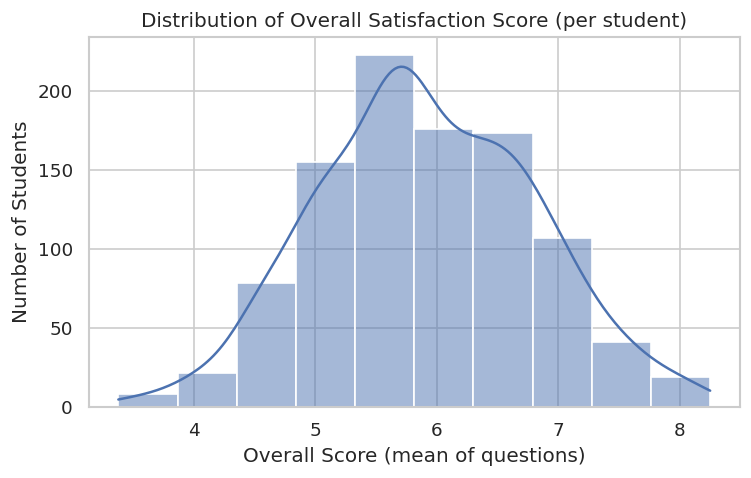

Mean Overall Score:  5.92
Median Overall Score: 5.88


In [14]:
# 8) Visualization section
# 8.1 Overall Score distribution
plt.figure(figsize=(7,4))
ax = sns.histplot(df['Overall_Score'], bins=10, kde=True)
ax.set_xlabel('Overall Score (mean of questions)')
ax.set_ylabel('Number of Students')
ax.set_title('Distribution of Overall Satisfaction Score (per student)')
plt.show()

print("Mean Overall Score: ", round(df['Overall_Score'].mean(),2))
print("Median Overall Score:", round(df['Overall_Score'].median(),2))


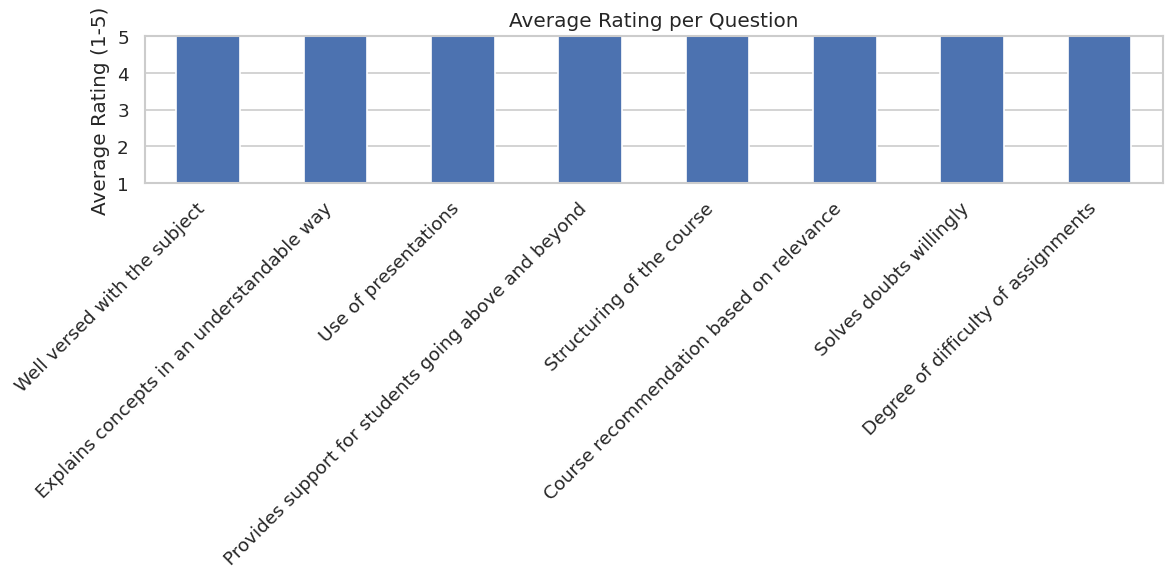

In [15]:
# 8.2 Per-question average bar chart (1-5 scale)
plt.figure(figsize=(10,5))
means = df[rating_cols].mean().sort_values(ascending=False)
ax = means.plot(kind='bar')
ax.set_ylim(1,5)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('Average Rating (1-5)')
ax.set_title('Average Rating per Question')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# 8.3 Per-question distribution: stacked counts for 1..5
# Prepare data
dist_df = pd.DataFrame()
for c in rating_cols:
    counts = df[c].value_counts().reindex(range(1,6), fill_value=0)
    dist_df[c] = counts

dist_df = dist_df.T  # questions as rows


<Figure size 1200x720 with 0 Axes>

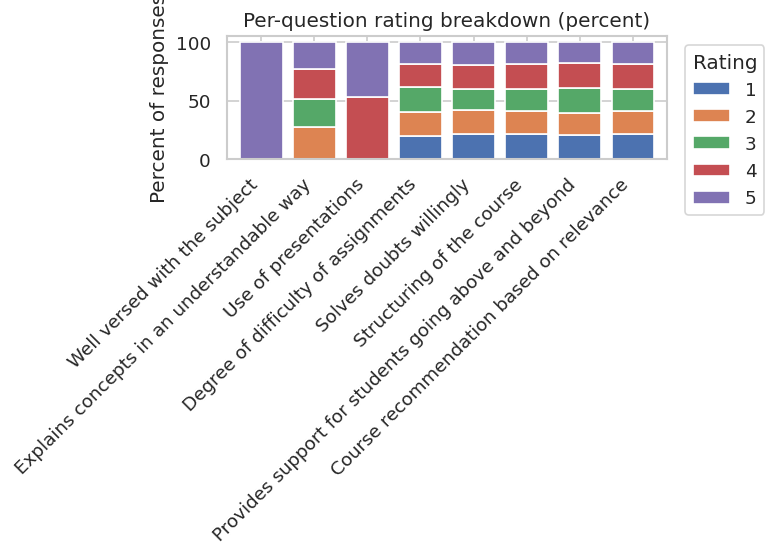

In [17]:
# Plot stacked bar (percent)
percent_df = dist_df.div(dist_df.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
percent_df.plot(kind='bar', stacked=True, width=0.8)
plt.legend(title='Rating', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Percent of responses')
plt.title('Per-question rating breakdown (percent)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


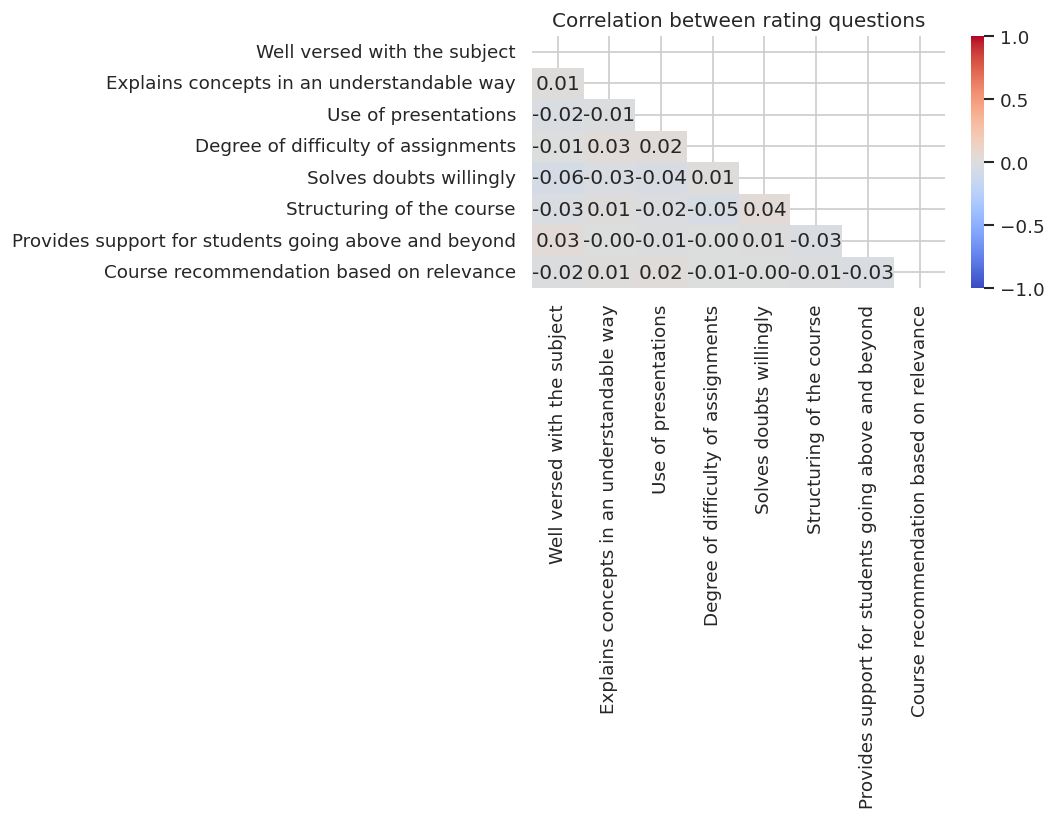

In [18]:
# 8.4 Correlation heatmap (how questions relate)
corr = df[rating_cols].corr()
plt.figure(figsize=(9,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation between rating questions')
plt.tight_layout()
plt.show()

In [19]:
# 8.5 Radar chart of mean scores (gives a quick visual of strengths/weaknesses)
# Radar requires equal-length and numeric: we'll use means values
means_vals = df[rating_cols].mean().values
labels = rating_cols
num_vars = len(labels)


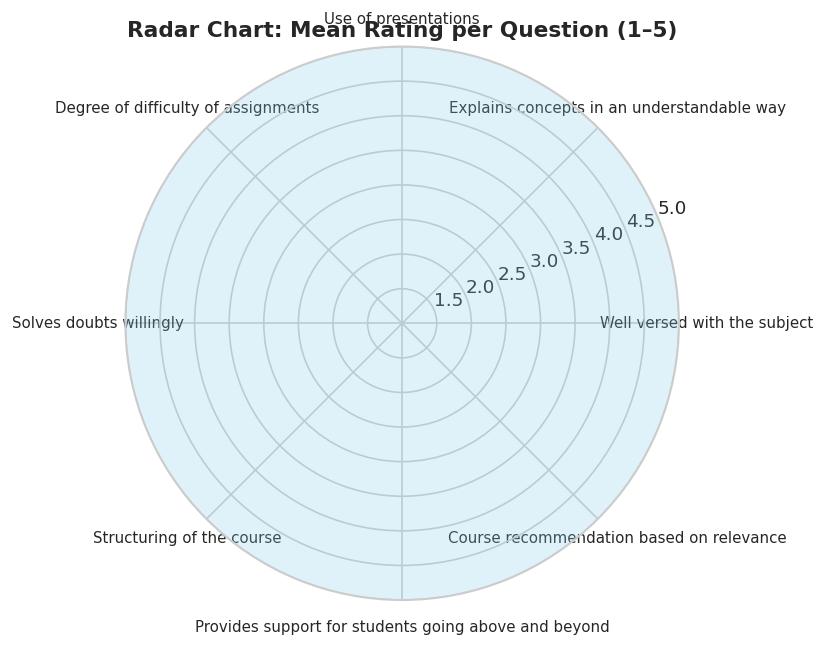

In [29]:
# Mean values (should match the number of labels)
means_vals = df[labels].mean().tolist()

# Close the loop for radar chart (add first element again)
means_vals += means_vals[:1]
angles = np.linspace(0, 2 * np.pi, len(labels) + 1)

# Plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, means_vals, linewidth=2, color='blue')
ax.fill(angles, means_vals, color='skyblue', alpha=0.25)

# Set labels and limits
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=9)
ax.set_ylim(1, 5)
ax.set_title('Radar Chart: Mean Rating per Question (1–5)', size=13, weight='bold')

plt.tight_layout()
plt.show()

In [23]:
# 9) Insights / Automated Observations
insights = []

# Top 3 strongest questions (highest mean)
top3 = means.sort_values(ascending=False).head(3)
insights.append("Top 3 best-rated aspects:\n" + "\n".join([f"  • {i}: {v:.2f}" for i,v in top3.items()]))


In [24]:
# Bottom 3 weakest questions (lowest mean)
bottom3 = means.sort_values(ascending=True).head(3)
insights.append("Top 3 lowest-rated aspects:\n" + "\n".join([f"  • {i}: {v:.2f}" for i,v in bottom3.items()]))

In [25]:
# Overall satisfaction
overall_mean = df['Overall_Score'].mean()
insights.append(f"Average overall satisfaction (student-level mean across questions): {overall_mean:.2f} (scale 1-5)")


In [26]:
# Identify any question pairs with very low correlation (possible independent issues)
low_corr_pairs = []
for i in range(len(rating_cols)):
    for j in range(i+1, len(rating_cols)):
        q1 = rating_cols[i]; q2 = rating_cols[j]
        cval = corr.loc[q1,q2]
        if abs(cval) < 0.2:
            low_corr_pairs.append((q1, q2, cval))
if low_corr_pairs:
    insights.append("Question pairs with low correlation (|r| < 0.2), meaning responses behave independently for these aspects. Consider separate interventions for them.")
    # list top 5 pairs
    insights.extend([f"  • {a} vs {b}: r={c:.2f}" for a,b,c in low_corr_pairs[:5]])
else:
    insights.append("Most rating questions show moderate-to-high inter-correlation (responses are fairly consistent).")

print("\n----- AUTOMATIC INSIGHTS -----\n")
for s in insights:
    print(s)
print("\n------------------------------\n")


----- AUTOMATIC INSIGHTS -----

Top 3 best-rated aspects:
  • Well versed with the subject: 7.50
  • Explains concepts in an understandable way: 6.08
  • Use of presentations: 5.94
Top 3 lowest-rated aspects:
  • Degree of difficulty of assignments: 5.43
  • Solves doubts willingly: 5.47
  • Course recommendation based on relevance: 5.60
Average overall satisfaction (student-level mean across questions): 5.92 (scale 1-5)
Question pairs with low correlation (|r| < 0.2), meaning responses behave independently for these aspects. Consider separate interventions for them.
  • Well versed with the subject vs Explains concepts in an understandable way: r=0.01
  • Well versed with the subject vs Use of presentations: r=-0.02
  • Well versed with the subject vs Degree of difficulty of assignments: r=-0.01
  • Well versed with the subject vs Solves doubts willingly: r=-0.06
  • Well versed with the subject vs Structuring of the course: r=-0.03

------------------------------



In [28]:
# 10) Save cleaned dataset and summary
out_clean = "/content/cleaned_student_feedback.xlsx"
df.to_excel(out_clean, index=False)
out_summary = "/content/per_question_summary.csv"
summary.to_csv(out_summary)

print("Saved cleaned dataset to:", out_clean)
print("Saved per-question summary to:", out_summary)

Saved cleaned dataset to: /content/cleaned_student_feedback.xlsx
Saved per-question summary to: /content/per_question_summary.csv
